<a href="https://colab.research.google.com/github/O-Kpy/Project/blob/main/Kaggle_Survey_viz_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Me(Kaggle Survey Project)

- 취직을 앞둔 나에게 데이터 분석가가 되어 나아가야할 방향을 알고싶어 이 Project를 실시

- 2020's, 2017's, 2018's, 2019's survey 존재

- 데이터 분석가가 되고자 하는 이들에게도 주요한 Project가 될 것이다.

- 변수들 설명 ==> 'kaggle_survey_2020_answer_choices.pdf'
    - 39+ 질문 and 20,036 답변
    - 단답형 질문과 multiple choices가 있다.

- index[0]에 Questions이 있다. ==> index[0]가 columns로 처리

> feature 전처리
  - 나라(country)이름 처리(replace)
  - 성별(sex) man, woman처리(replace)
  - 나이(age) 처리

> 해야 할 것(To do)
  - EDA : 기본 인적 사항(Gender, Age)(完)
  - EDA : 연봉별(Salary)(完)
  - EDA : 직업별(Job)(完)
  - EDA : DS 교육받는 곳, 가장 필요한 것(skill)




In [1]:
!pip install plotly.express
!pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
font = dict(fontsize=20, fontweight='bold', fontfamily='serif')
import plotly.express as px

In [3]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle survey/2020/kaggle_survey_2020_responses.csv')

In [4]:
data = data.T.reset_index(drop=True).set_index([0]).T  # column 처리
data['In which country do you currently reside?'] = data['In which country do you currently reside?'].replace({'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland':'UK', 'United Arab Emirates':'UAE', 'Iran, Islamic Republic of...':'Iran'})  # USA, US 처리

for i in ['Prefer to self-describe', 'Prefer not to say', 'Nonbinary']:
  data['What is your gender? - Selected Choice'] = data['What is your gender? - Selected Choice'].replace({i:np.NaN})  # 성별 man, woman 처리

data['What is your age (# years)?'] = data['What is your age (# years)?'].replace({'22-24':'22-29', '25-29':'22-29', '30-34':'30-39', '35-39':'30-39', '40-44':'40-49', '45-49':'40-49', '50-54':'50-59', '55-59':'50-59'})  # 나이 처리

# 1. EDA : 기본 인적 사항

In [ ]:
sns.color_palette('coolwarm')

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

Text(0.5, 0.98, 'Country(Top 21) - count, pie')

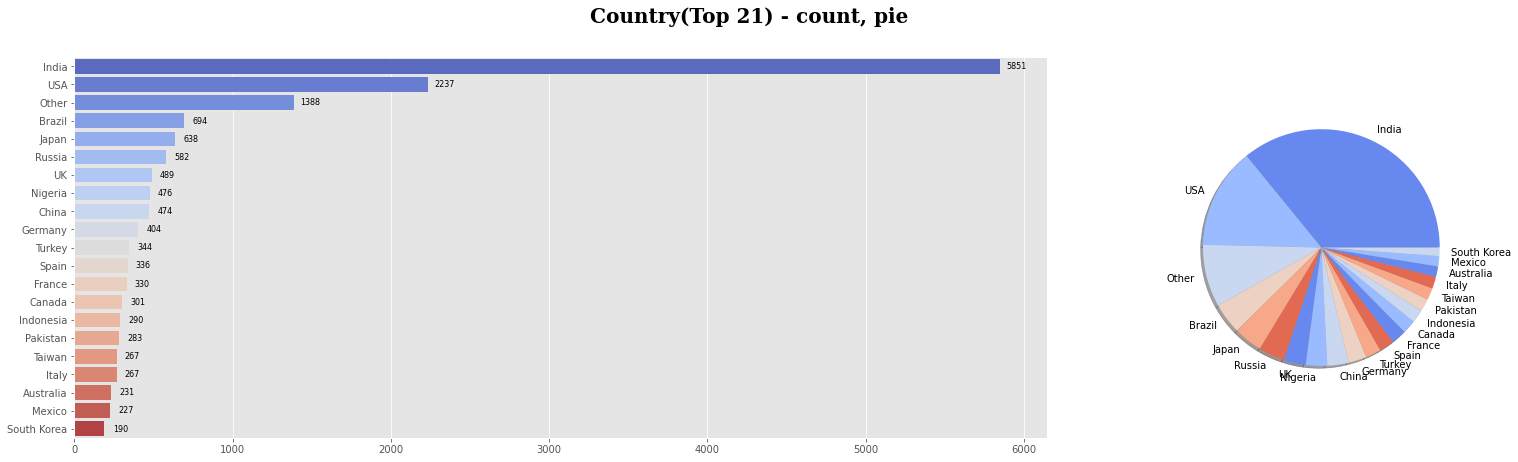

In [ ]:
top_21_country = data['In which country do you currently reside?'].value_counts().sort_values(ascending=False)[:21]

fig, ax = plt.subplots(1, 2, figsize=(25,7), gridspec_kw={'width_ratios':[2.3, 0.7]})
sns.barplot(y=top_21_country.index, x=top_21_country, palette=sns.color_palette('coolwarm', n_colors=len(top_21_country.index)), ax=ax[0])
ax[0].set_xlabel('')
for i,j in enumerate(top_21_country.index):
  ax[0].annotate(f"{top_21_country[j]}", xy=(top_21_country[j] + 100, i), ha='center', va='center', fontsize=8, fontweight='light')

ax[1].pie(top_21_country, labels=top_21_country.index, shadow=True, colors=sns.color_palette('coolwarm'))

fig.suptitle('Country(Top 21) - count, pie', fontsize=20, fontweight='bold', fontfamily='serif')

Text(0.5, 1.0, 'Distribution of men and women Normalize Ratio')

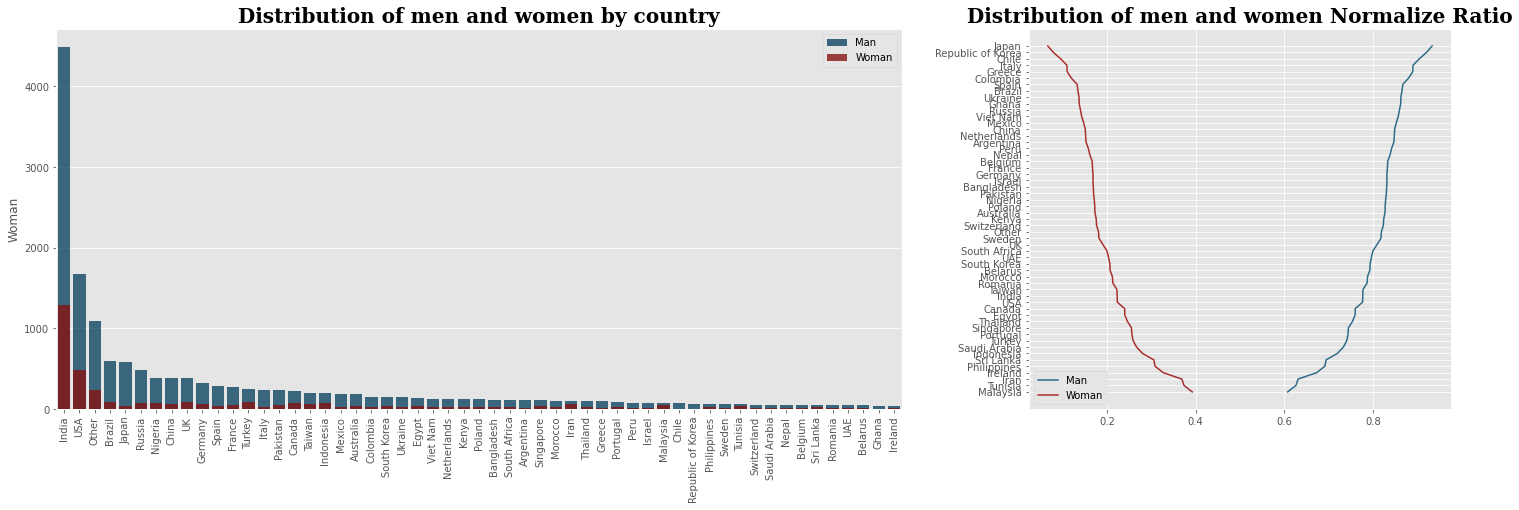

In [ ]:
g_r = data.groupby('In which country do you currently reside?')['What is your gender? - Selected Choice'].value_counts().unstack().sort_values('Man', ascending=False)
fig, ax = plt.subplots(1,2, figsize=(25,7), gridspec_kw={'width_ratios':[2, 1]})
sns.barplot(x=g_r.index, y=g_r['Man'], color='#004c70', label='Man', ax=ax[0], alpha=0.8)
sns.barplot(x=g_r.index, y=g_r['Woman'], color='#990000', label='Woman', ax=ax[0], alpha=0.8)
ax[0].legend()
ax[0].set_xticklabels(g_r.index, rotation=90)
ax[0].set_xlabel('')
ax[0].set_title('Distribution of men and women by country', fontsize=20, fontweight='bold', fontfamily='serif')

r_g = data.groupby('In which country do you currently reside?')['What is your gender? - Selected Choice'].value_counts(normalize=True).unstack().sort_values('Woman', ascending=False)  # 각 나라의 남녀 비율

ax[1].plot(r_g['Man'], r_g.index, label='Man', color='#004c70', alpha=0.8)
ax[1].plot(r_g['Woman'], r_g.index, label='Woman', color='#990000', alpha=0.8)
ax[1].set_xlabel('sex ratio')
ax[1].legend()
ax[1].set_xlabel('')
ax[1].set_title('Distribution of men and women Normalize Ratio', fontsize=20, fontweight='bold', fontfamily='serif')

Text(0.5, 0.98, 'Distribution of Age by country')

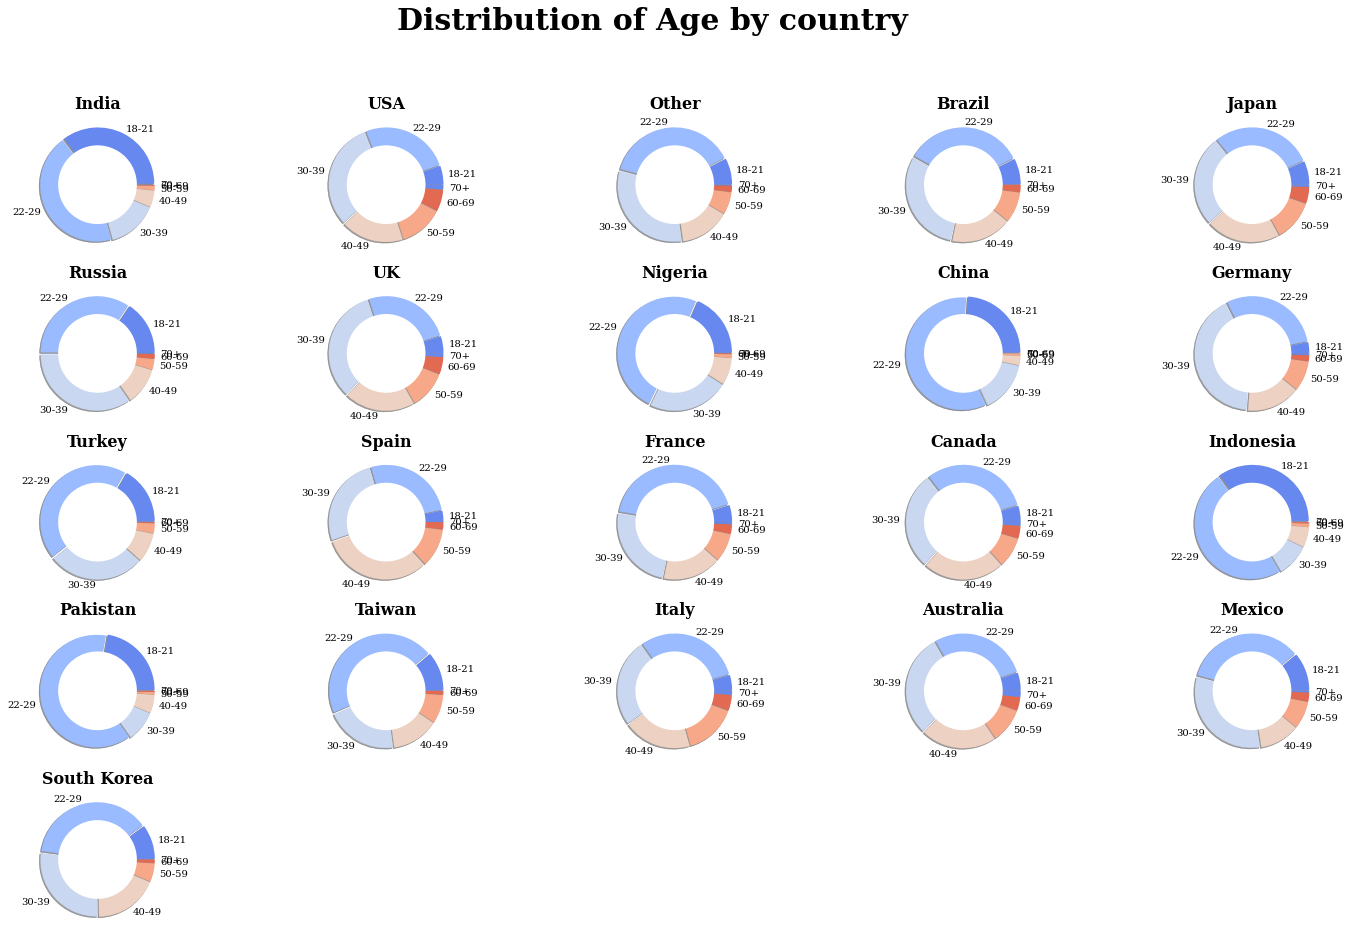

In [ ]:
r_a = data.groupby('In which country do you currently reside?')['What is your age (# years)?'].value_counts()[top_21_country.index].unstack().fillna(0).T

fig = plt.figure(figsize=(25,15))
for i,j in enumerate(r_a.columns):
  ax = plt.subplot(5,5, i+1)
  ax.pie(x=r_a[j], labels=r_a[j].index, shadow=True, explode=[0.02 for i in range(len(r_a[j].index))], 
         colors=sns.color_palette('coolwarm'), startangle=0, pctdistance=.8, textprops={'weight':'light', 'family':'serif'})
  ax.set_title(f'{j}', fontsize=16, fontfamily='serif', fontweight='bold')
  centre_circle = plt.Circle((0,0), 0.70, color='black', fc='white', linewidth=0)
  ax.add_artist(centre_circle)

plt.suptitle('Distribution of Age by country', fontsize=30, fontweight='bold', fontfamily='serif')

# 기본 인적사항 EDA으로 알 수 있는 것
- 전체 Answer중 국가(country) 분포(Top21) :
    - Top21 : 'India', 'USA', 'Other', 'Brazil', 'Japan', 'Russia', 'UK', 'Nigeria',
       'China', 'Germany', 'Turkey', 'Spain', 'France', 'Canada', 'Indonesia',
       'Pakistan', 'Taiwan', 'Italy', 'Australia', 'Mexico', 'South Korea' 순  **(Top 21)**
    - India, USA가 차지 하는 비율이 40%
    - 우리나라는 21위 딱 중위권이다. (실망...) --> Data Science에 관심있는 사람이 부족하다는 것을 말한다.
    - 국가별 연봉 분포 viz하기(column=What is your current yearly compensation (approximate $USD)?)

- 전체 Answer중 남녀(sex) 분포 : 
    - 남녀 평균 비율은 8:2 --> Data Science에 관심있는 성별은 남자
    - Top21 국가 중 Japan은 9.3:0.7의 성별분포를 가진다. --> 여성의 비율이 극히 낮음
    - 남녀별 연봉 분포 viz하기


- 전체 Answer중 나이(age) 분포 :
    - 대체로 18-49세까지의 나이가 제일 많이 분포
    - India, Nigeria, China, Indonesia, Pakistan에서 18-29세 이용자가 70% 이상을 차지하고 있다. --> 젊은 Data 분석가가 많음, IT종사자가 많음
    - India, Nigeria, China, Indonesia, Pakistan를 제외하면 22-49세 이용자가 50% 이상을 차지함
    - 1인당 GDP가 높은 나라 일수록 40+ 이용자가 많음



# 2. EDA : 연봉과 학위, 직업

In [ ]:
sns.light_palette('seagreen')

[(0.921460863132993, 0.9512120106378944, 0.9302557793948234),
 (0.7732471218789434, 0.8699892163534527, 0.8124399176335058),
 (0.6250333806248938, 0.7887664220690112, 0.6946240558721881),
 (0.4768196393708443, 0.7075436277845695, 0.5768081941108705),
 (0.32860589811679464, 0.6263208335001278, 0.4589923323495529),
 (0.1803921568627451, 0.5450980392156862, 0.3411764705882353)]

In [5]:
USD = ['$0-999',	'1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999',	'5,000-7,499', '7,500-9,999', '10,000-14,999',	'15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000-299,999', '300,000-500,000', '> $500,000']

Text(0.5, 1.0, 'Salar Distribution')

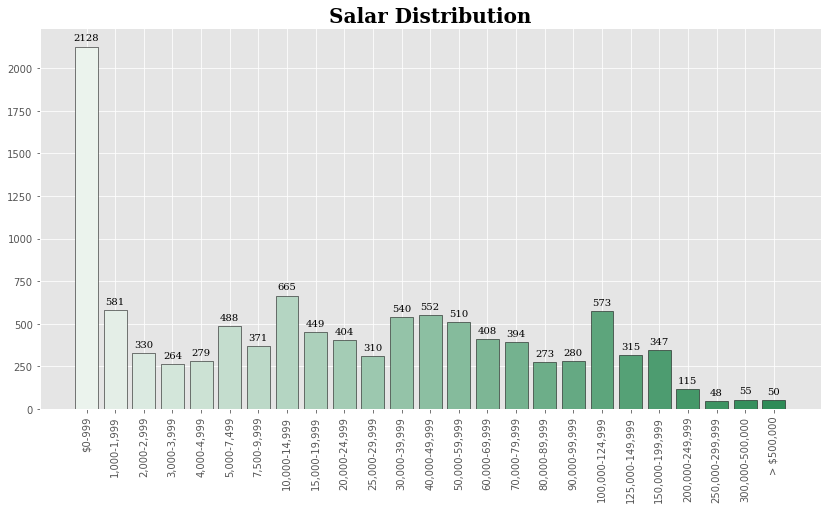

In [ ]:
USD_value_counts = data['What is your current yearly compensation (approximate $USD)?'].value_counts()[USD]  # 연봉 value_counts

plt.figure(figsize=(14,7))
plt.bar(USD_value_counts.index, USD_value_counts, color=sns.light_palette('seagreen', n_colors=len(USD_value_counts.index)), edgecolor='black')
for j, i in enumerate(USD_value_counts.index):
  plt.annotate(f"{USD_value_counts[i]}", xy=(j, USD_value_counts[i]+50), ha='center', va='center', fontweight='light', fontfamily='serif')
plt.xticks(rotation=90)
plt.title('Salar Distribution', fontdict=font)

Text(0.5, 1.0, 'Salary&Gender Normalize Ratio')

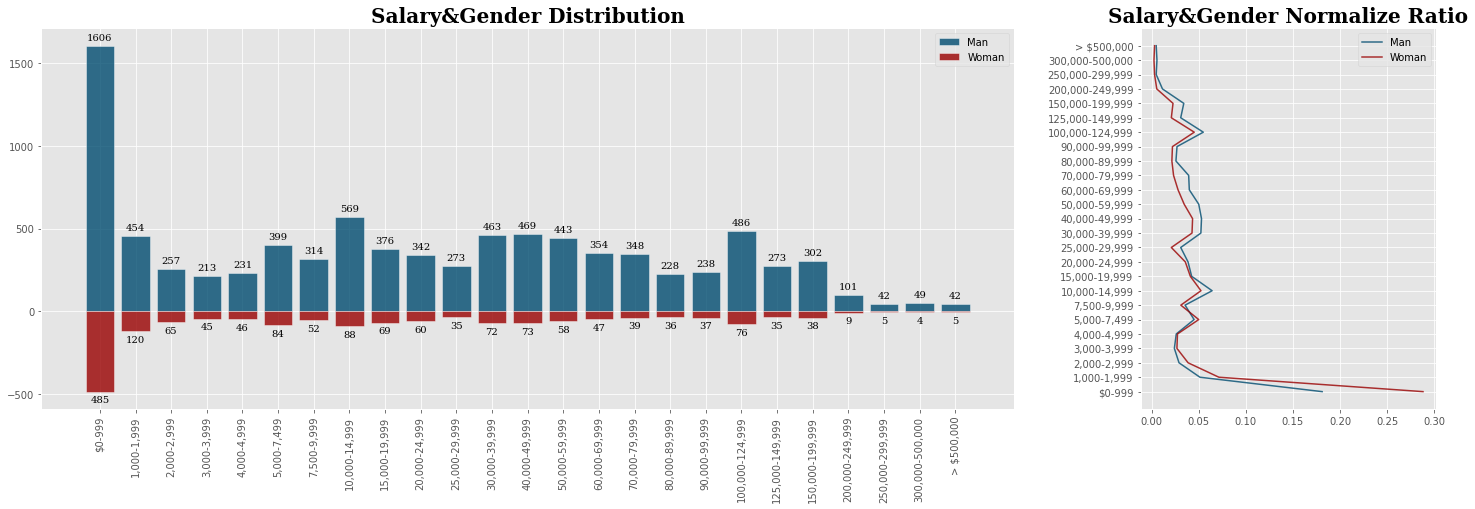

In [ ]:
s_c = data.groupby('What is your gender? - Selected Choice')['What is your current yearly compensation (approximate $USD)?'].value_counts().unstack()[USD].T
s_c_normalize = data.groupby('What is your gender? - Selected Choice')['What is your current yearly compensation (approximate $USD)?'].value_counts(normalize=True).unstack()[USD].T

fig, ax = plt.subplots(1,2,figsize=(25,7), gridspec_kw={'width_ratios':[2.3, 0.7]})
ax[0].bar(s_c.index, s_c['Man'], label='Man', color='#004c70', alpha=0.8, edgecolor='white')
for j, i in enumerate(s_c.index):
  ax[0].annotate(f"{s_c['Man'].loc[i]}", xy=(j, s_c['Man'].loc[i]+50), ha='center', va='center', fontweight='light', fontfamily='serif')
ax[0].bar(s_c.index, -s_c['Woman'], label='Woman', color='#990000', alpha=0.8, edgecolor='white')
for j, i in enumerate(s_c.index):
  ax[0].annotate(f"{s_c['Woman'].loc[i]}", xy=(j, -s_c['Woman'].loc[i]-50), ha='center', va='center', fontweight='light', fontfamily='serif')

ax[0].legend()
ax[0].set_xticklabels(s_c.index ,rotation=90)
ax[0].set_title('Salary&Gender Distribution', fontdict=font)

ax[1].plot(s_c_normalize['Man'], s_c_normalize.index, color='#004c70', label='Man', alpha=0.8)
ax[1].plot(s_c_normalize['Woman'], s_c_normalize.index, color='#990000', label='Woman', alpha=0.8)
ax[1].legend()
ax[1].set_title('Salary&Gender Normalize Ratio', fontdict=font)

Text(0.5, 0.98, 'Salary distribution by country(Top25 Country)')

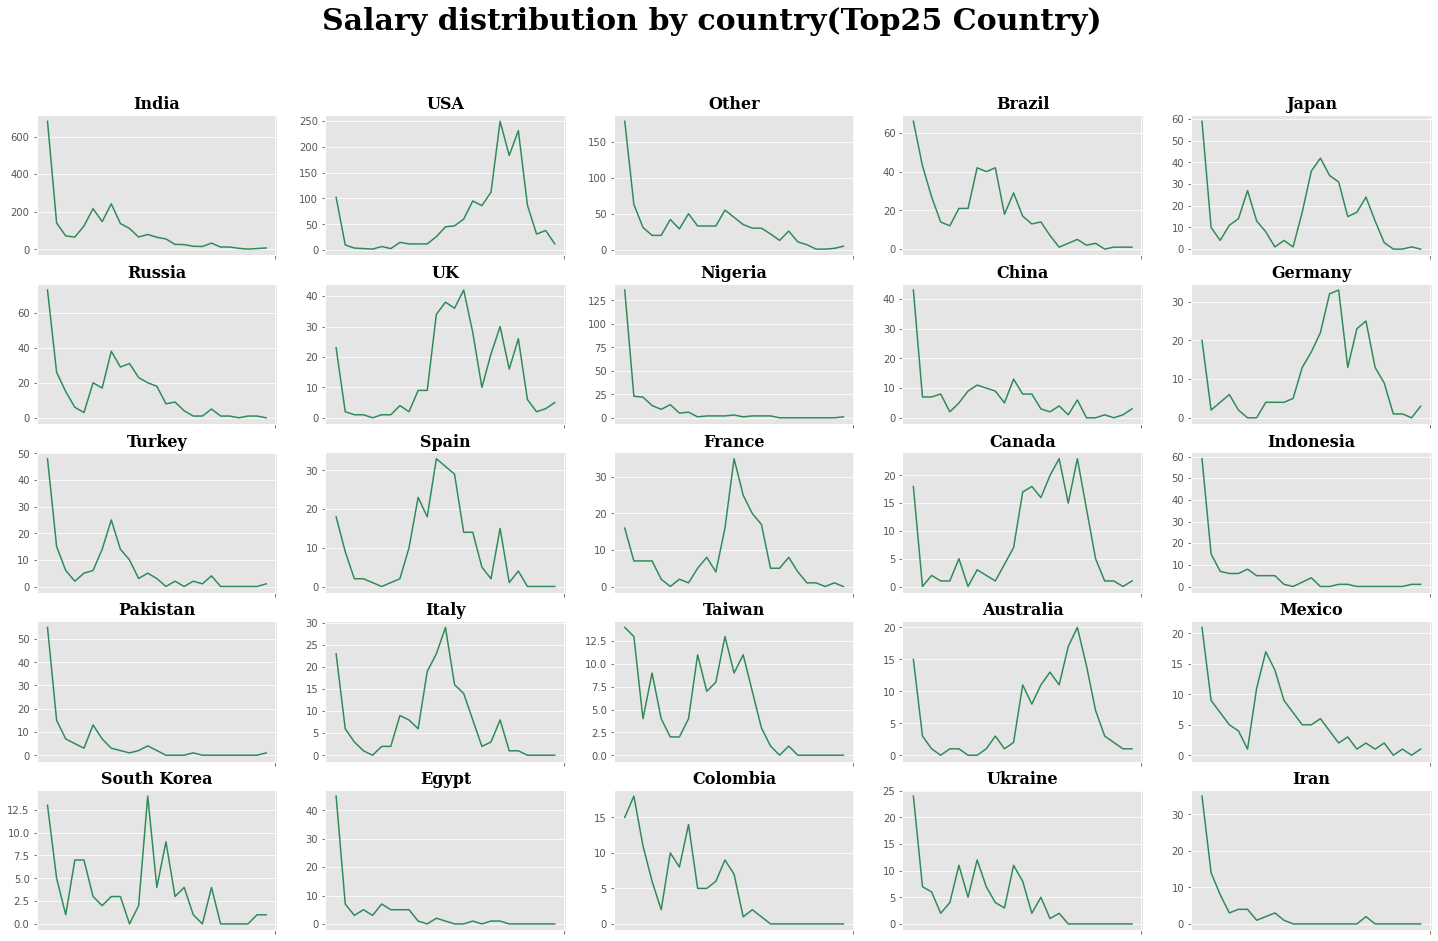

In [6]:
top_25_country = data['In which country do you currently reside?'].value_counts()[:25].index
c_r = data.groupby('What is your current yearly compensation (approximate $USD)?')['In which country do you currently reside?'].value_counts().unstack()[top_25_country].T[USD].fillna(0).T

fig = plt.figure(figsize=(25,15))
for j, i in enumerate(c_r.columns):
  plt.subplot(5,5, j+1)
  sns.lineplot(c_r.index, c_r[i], color=sns.light_palette('seagreen')[5])
  plt.xticks('')
  plt.xlabel('')
  plt.ylabel('')
  plt.title(f'{i}', fontsize=16, fontfamily='serif', fontweight='bold')

plt.suptitle('Salary distribution by country(Top25 Country)', fontsize=30, fontweight='bold', fontfamily='serif')

In [ ]:
y_s = data.groupby(['What is your age (# years)?'])['What is your current yearly compensation (approximate $USD)?'].value_counts().unstack().fillna(0)[USD]

fig = plt.figure(figsize=(25,15))
for i,j in enumerate(y_s.columns):
  ax = plt.subplot(5,5, i+1)
  ax.pie(x=y_s[j], labels=y_s[j].index, shadow=True, explode=[0.02 for i in range(len(y_s[j].index))], 
         colors=sns.light_palette('seagreen'), startangle=0, pctdistance=.8, textprops={'weight':'light', 'family':'serif'})
  ax.set_title(f'{j}', fontsize=16, fontfamily='serif', fontweight='bold')
  centre_circle = plt.Circle((0,0), 0.70, color='black', fc='white', linewidth=0)
  ax.add_artist(centre_circle)

plt.suptitle('Distribution of Salary by Age', fontsize=30, fontweight='bold', fontfamily='serif')

# 위 시각화로 알 수 있는 것

- 제시된 금액은 연봉이다.($)

- 0-999의 연봉자의 분포가 가장 높다. --> 인건비가 싼 India, Nigeria, China,  Indonesia의 존재 때문

- 남녀 임금 차이는 0-999의 연봉자 여성의 비율이 0-999 연봉자 남성보다 높았다. 하지만 나머지 고액 연봉은 남성의 비율이 좀 더 높았다. --> 고액 연봉자 비율은 남성이 더 높다.

- USA, UK, Germany, Spain, France, Canada, Italy, Australia, South Korea는 0-999 연봉자보다 훨씬 고액의 연봉자가 더 많다. --> 1인당 GDP가 높은 나라는 고액 연봉자의 비율이 더 높다.

- 당연하겠지만 나이가 많아질수록 연봉이 올라감

- Age vs Salary에서 눈 여겨 봐야 할 것은 >500,000의 분포인데 18-21, 22-29세 분포가 높다는 것이다.(이상 값이 아닐까...? 이상 값이었으면 좋겠다...)

# 더 알아보고 싶은 것  
- 남녀 연봉 차이가 왜 나는 것인가? (完)

- Job에 따라 연봉 차이가 얼마나 나는가?(完)

- 학력에 따라 연봉 차이가 얼마나 나는가?

- 여러 스킬별로 연봉 차이가 어떻게 나는가? --> 특정 언어가 중요한가? 아님 여러가지를 하는 것이 중요한가?


---



# 남녀 연봉 차이가 왜 나는 것인가? 
에 대한 답 --> Japan과 같이 남성의 비율이 특히 높은 나라들 때문이다.(여성이 아예 없기도 한 연봉 구간이 있다.)


# Job에 따라 연봉 차이가 얼마나 나는가?
에 대한 답 --> 
  - 기본적으로 Data Scientist의 분포가 가장 많다.
  - 직업마다 연봉 차이는 크지 않다.

# 학위에 따라 연봉 차이가 얼마나 나는가?
에 대한 답 --> 
  - Master degree와 bacholor degree의 분포가 가장 많다.
  - Master's degree를 받으면 Bachelor's degree보다 고연봉일 확률이 2배 이상 높다. --> 석사를 따야하는 이유...
  - Doctoral degree는 고연봉의 분포가 많다.


# ==> 연봉의 상관관계는 Country, Age, Degree가 높다.

In [ ]:
# plotly ver
data_crg = data.groupby(['What is your current yearly compensation (approximate $USD)?', 'In which country do you currently reside?'])['What is your gender? - Selected Choice'].value_counts().reset_index(name='count')

fig = px.treemap(data_frame=data_crg, path=['In which country do you currently reside?', 'What is your current yearly compensation (approximate $USD)?', 'What is your gender? - Selected Choice'], values='count', color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title='Country vs Salary',font={'size':20, 'family':'sans-serif', 'color':'#4a4a4a'} )
fig.add_annotation(text="vs Gender",
                  xref="paper", yref="paper",
                  x=-0.007, y=1.06, showarrow=False,
                  font={'size':20, 'family':'serif', 'color':'#4a4a4a'})

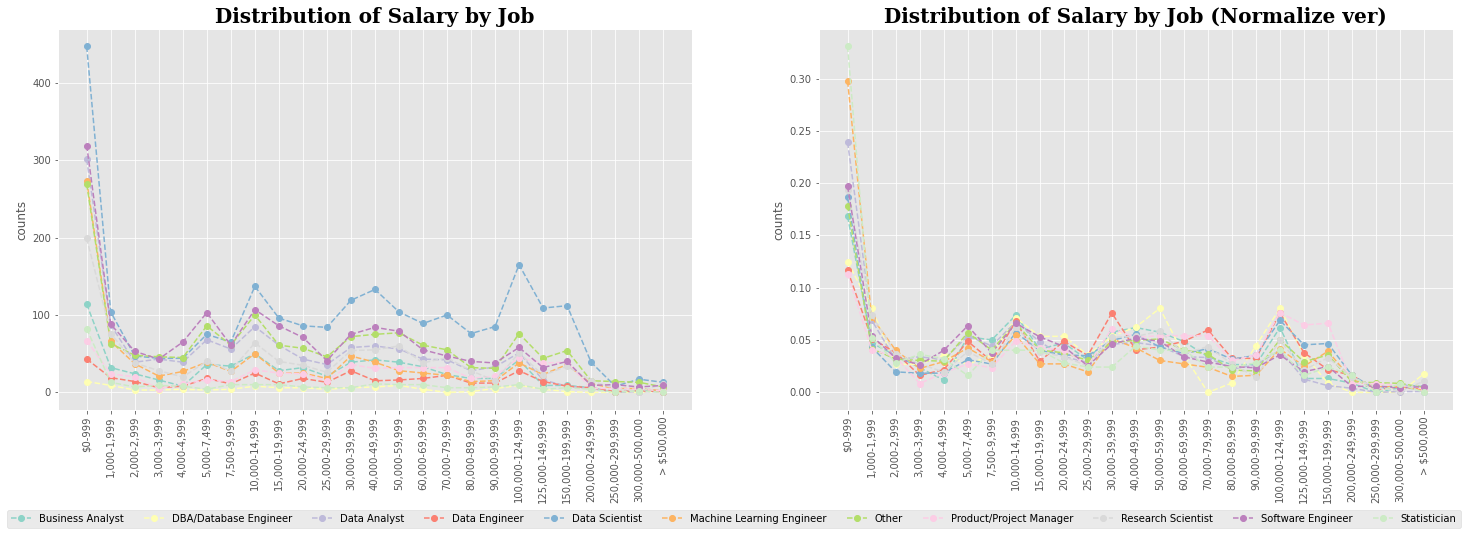

In [ ]:
s_j = data.groupby('Select the title most similar to your current role (or most recent title if retired): - Selected Choice')['What is your current yearly compensation (approximate $USD)?'].value_counts().unstack()[USD].fillna(0).T.astype('int')
s_j_norm = data.groupby('Select the title most similar to your current role (or most recent title if retired): - Selected Choice')['What is your current yearly compensation (approximate $USD)?'].value_counts(normalize=True).unstack()[USD].fillna(0).T
fig, ax = plt.subplots(1, 2, figsize=(25,7))
for j, i in enumerate(s_j.columns):
  ax[0].plot(s_j.index, s_j[i], label=f'{i}', marker='o', linestyle='--', color=sns.color_palette('Set3', n_colors=len(s_j.columns))[j])
ax[0].set_xticklabels(s_j.index, rotation=90)
ax[0].set_xlabel('')
ax[0].set_ylabel('counts')
ax[0].set_title('Distribution of Salary by Job', fontdict=font)

for j, i in enumerate(s_j_norm.columns):
  ax[1].plot(s_j_norm.index, s_j_norm[i], label=f'{i}', marker='o', linestyle='--', color=sns.color_palette('Set3', n_colors=len(s_j_norm.columns))[j])
ax[1].set_xticklabels(s_j_norm.index, rotation=90)
ax[1].legend()
ax[1].set_xlabel('')
ax[1].set_ylabel('counts')
ax[1].set_title('Distribution of Salary by Job (Normalize ver)', fontdict=font)
plt.legend(bbox_to_anchor=(1.02,-0.25), ncol=len(s_j.columns) )

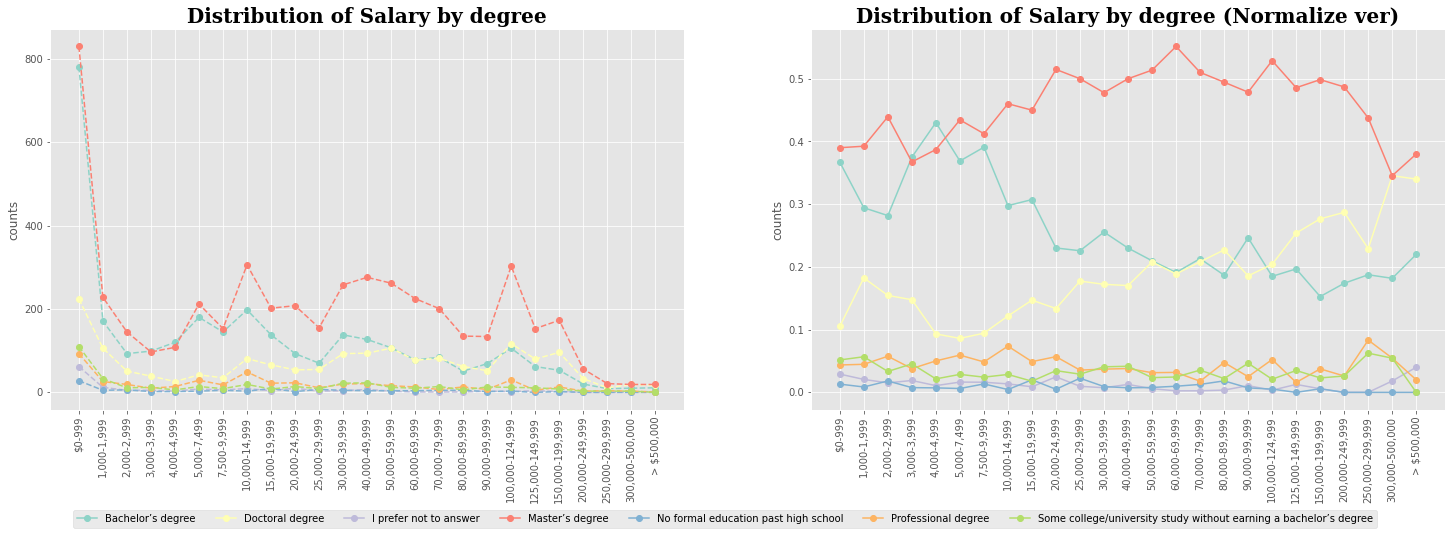

In [ ]:
s_e = data.groupby('What is your current yearly compensation (approximate $USD)?')['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().unstack().T[USD].fillna(0).T
s_e_norm = data.groupby('What is your current yearly compensation (approximate $USD)?')['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts(normalize=True).unstack().T[USD].fillna(0).T
fig, ax = plt.subplots(1, 2, figsize=(25,7))
for j, i in enumerate(s_e.columns):
  ax[0].plot(s_e.index, s_e[i], label=f'{i}', marker='o', linestyle='--', color=sns.color_palette('Set3', n_colors=len(s_e.columns))[j])
ax[0].set_xticklabels(s_e.index, rotation=90)
ax[0].set_xlabel('')
ax[0].set_ylabel('counts')
ax[0].set_title('Distribution of Salary by degree', fontdict=font)

for j, i in enumerate(s_e_norm.columns):
  ax[1].plot(s_e_norm.index, s_e_norm[i], label=f'{i}', marker='o', linestyle='-', color=sns.color_palette('Set3', n_colors=len(s_e_norm.columns))[j])
ax[1].set_xticklabels(s_e_norm.index, rotation=90)
ax[1].set_xlabel('')
ax[1].set_ylabel('counts')
ax[1].set_title('Distribution of Salary by degree (Normalize ver)', fontdict=font)
plt.legend(bbox_to_anchor=(0.9,-0.25), ncol=len(s_e.columns) )

# EDA : 직업별

In [ ]:
sns.color_palette('Greys')

[(0.9295040369088812, 0.9295040369088812, 0.9295040369088812),
 (0.819115724721261, 0.819115724721261, 0.819115724721261),
 (0.6770011534025375, 0.6770011534025375, 0.6770011534025375),
 (0.5085736255286428, 0.5085736255286428, 0.5085736255286428),
 (0.35912341407151094, 0.35912341407151094, 0.35912341407151094),
 (0.1679354094579008, 0.1679354094579008, 0.1679354094579008)]

Text(0.5, 1.0, 'Job Distribution')

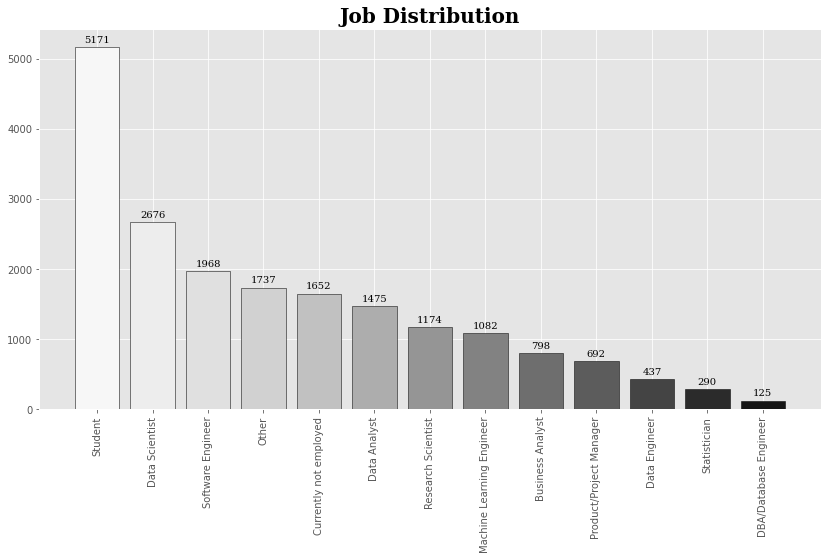

In [ ]:
degree_value = data['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts()

plt.figure(figsize=(14,7))
plt.bar(degree_value.index, degree_value, color=sns.color_palette('Greys', len(degree_value.index)), edgecolor='black')
for i, j in enumerate(degree_value.index):
  plt.annotate(f'{degree_value[j]}', xy=(i, degree_value[j] + 100), ha='center', va='center', fontweight='light', fontfamily='serif')
plt.xticks(rotation=90)
plt.title('Job Distribution', fontdict=font)

Text(0.5, 1.0, 'Job&Gender Normalize Ratio')

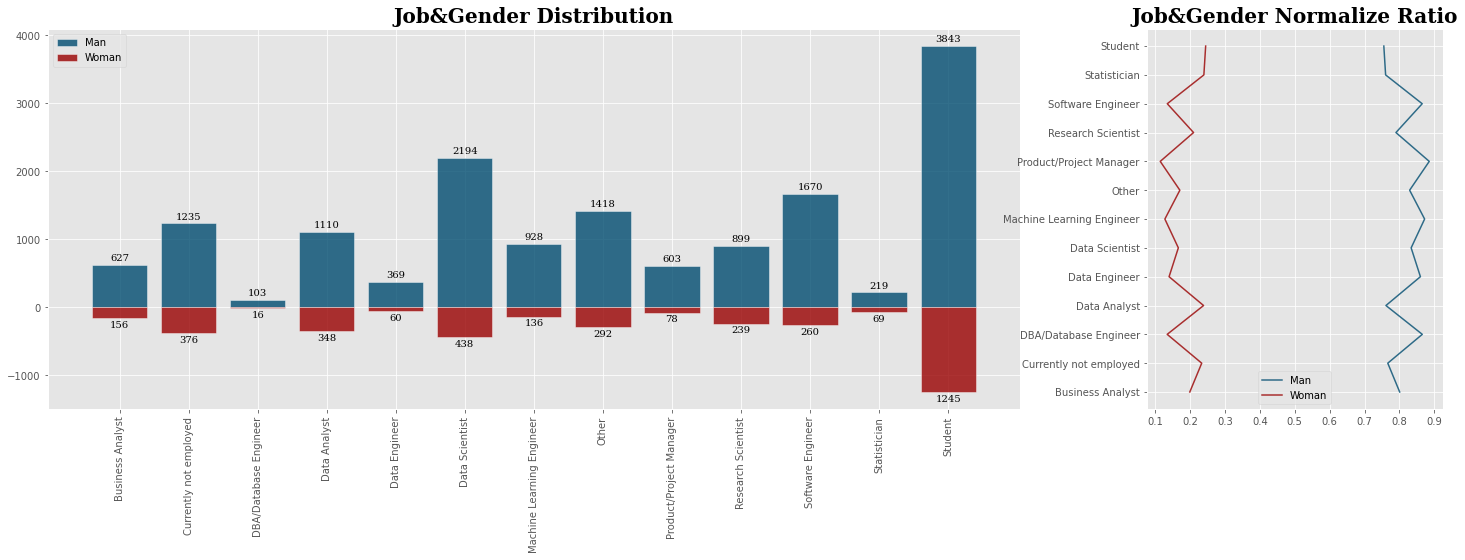

In [ ]:
j_g = data.groupby('Select the title most similar to your current role (or most recent title if retired): - Selected Choice')['What is your gender? - Selected Choice'].value_counts().unstack()
j_g_norm = data.groupby('Select the title most similar to your current role (or most recent title if retired): - Selected Choice')['What is your gender? - Selected Choice'].value_counts(normalize=True).unstack()



fig, ax = plt.subplots(1,2,figsize=(25,7), gridspec_kw={'width_ratios':[2.3, 0.7]})
ax[0].bar(j_g.index, j_g['Man'], label='Man', color='#004c70', alpha=0.8, edgecolor='white')
for j, i in enumerate(j_g.index):
  ax[0].annotate(f"{j_g['Man'].loc[i]}", xy=(j, j_g['Man'].loc[i]+100), ha='center', va='center', fontweight='light', fontfamily='serif')
ax[0].bar(j_g.index, -j_g['Woman'], label='Woman', color='#990000', alpha=0.8, edgecolor='white')
for j, i in enumerate(j_g.index):
  ax[0].annotate(f"{j_g['Woman'].loc[i]}", xy=(j, -j_g['Woman'].loc[i]-100), ha='center', va='center', fontweight='light', fontfamily='serif')

ax[0].legend()
ax[0].set_xticklabels(j_g.index ,rotation=90)
ax[0].set_title('Job&Gender Distribution', fontdict=font)

ax[1].plot(j_g_norm['Man'], j_g_norm.index, color='#004c70', label='Man', alpha=0.8)
ax[1].plot(j_g_norm['Woman'], j_g_norm.index, color='#990000', label='Woman', alpha=0.8)
ax[1].legend()
ax[1].set_title('Job&Gender Normalize Ratio', fontdict=font)

Text(0.5, 0.98, 'Job distribution by country(Top25 Country)')

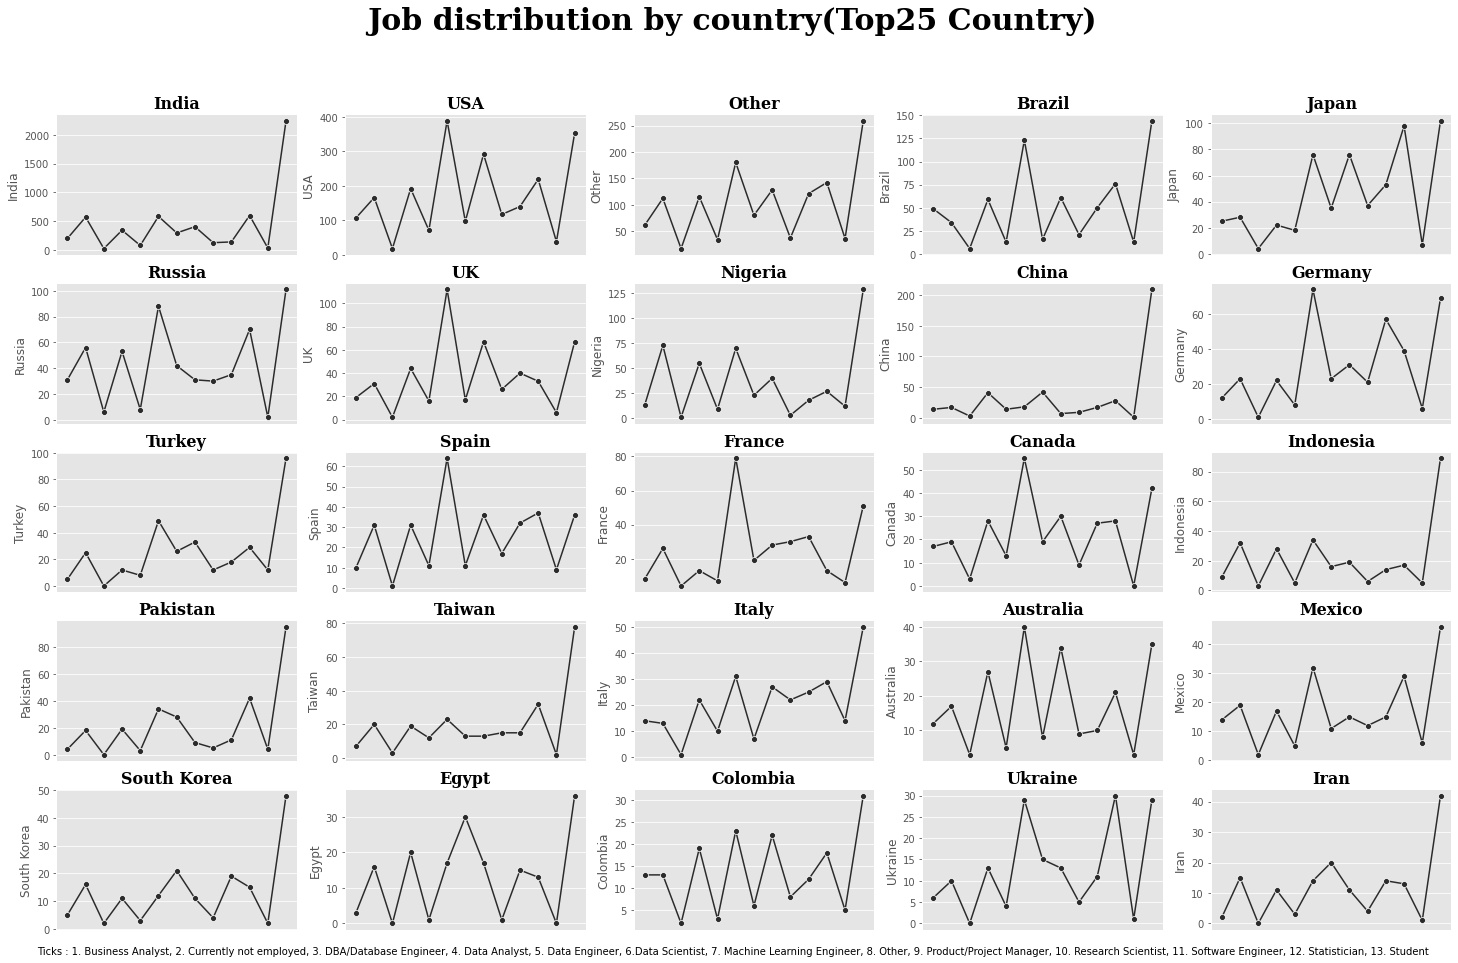

In [ ]:
# 나라별 job분포
c_j = data.groupby('In which country do you currently reside?')['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts().unstack().fillna(0).T[top_25_country].astype('int')
fig = plt.figure(figsize=(25,15))
for j, i in enumerate(c_j.columns):
  plt.subplot(5,5, j+1)
  sns.lineplot(c_j.index, c_j[i], color=sns.color_palette('Greys')[5], marker='o')
  plt.xticks('')
  plt.xlabel('')
  plt.title(f'{i}', fontsize=16, fontfamily='serif', fontweight='bold')
c_j_ticks = 'Ticks : 1. Business Analyst, 2. Currently not employed, 3. DBA/Database Engineer, 4. Data Analyst, 5. Data Engineer, 6.Data Scientist, 7. Machine Learning Engineer, 8. Other, 9. Product/Project Manager, 10. Research Scientist, 11. Software Engineer, 12. Statistician, 13. Student'  # tick
plt.text(-65, -10, s=c_j_ticks)
plt.suptitle('Job distribution by country(Top25 Country)', fontsize=30, fontweight='bold', fontfamily='serif')

# 위 시각화로 알 수 있는 것

- student가 가장 많고(India의 영향이 클 듯 하다), DS, SE, Other, None, DA순

- Gender별 Job 분포
  - 남성의 비율이 압도적이다.(남성의 비율이 0.7~)
  - 여성의 비율이 매우 적지만 여성 DA, Student, Statistician, BA가 차지 하는 비율은 꽤 높다.(0.2~)

- Country별 Job 분포
  - 대부분의 나라에서 Student가 가장 많다.
  - 1인당 GDP가 높은 나라와 낮은 나라의 차이가 있다.
  - 우리나라는 AI, 데이터 분석 분야 산업은 선진국들에 비해 뒤쳐지는 것 같다.
    - 관련 분야 종사자도 적고, Kaggle이용자도 적다.(꼭 해야하는것은 아니지만, 관심이 없는것 아닐까?), 재직자의 분포가 적은 것은 Kaggle을 student때만 하고 재직할때는 안한다는 뜻도 될 것이다.
    - Kaggle 이용 학생 수가 많다는 것은 긍정적이다.
  - 특이점 : 외국은 DS가 많은데 우리나라는 DS보다는 MLE가 더 많다. ==> DS와 MLE가 하는일이 비슷해서 그럴까?

# 더 알아 보고 싶은 것

- Job별로 선호하는 스킬 --> Python의 위엄...(역시 AI는 파이썬)
- 언어 공부 순서 파이썬 -> SQL or R -> C (직업별로 다름)


In [9]:
# 다중 컬럼에 대한 질문을 value_counts하는 함수
def severalcolumns_plot(data, mid_columns):
  temp_columns = [i for i in data.columns if i.find(mid_columns) != -1]
  counts = pd.Series()
  for i in temp_columns:
    counts = counts.append(data[i].value_counts())

  plt.figure(figsize=(14,7))
  plt.plot(counts.index, counts, marker='o', label=f'{mid_columns}')
  plt.xticks(rotation=90)
  plt.title(f'Most {mid_columns}', fontsize=14, fontweight='bold')

Text(0.5, 0.98, 'Recommend an aspiring data scientist to learn first')

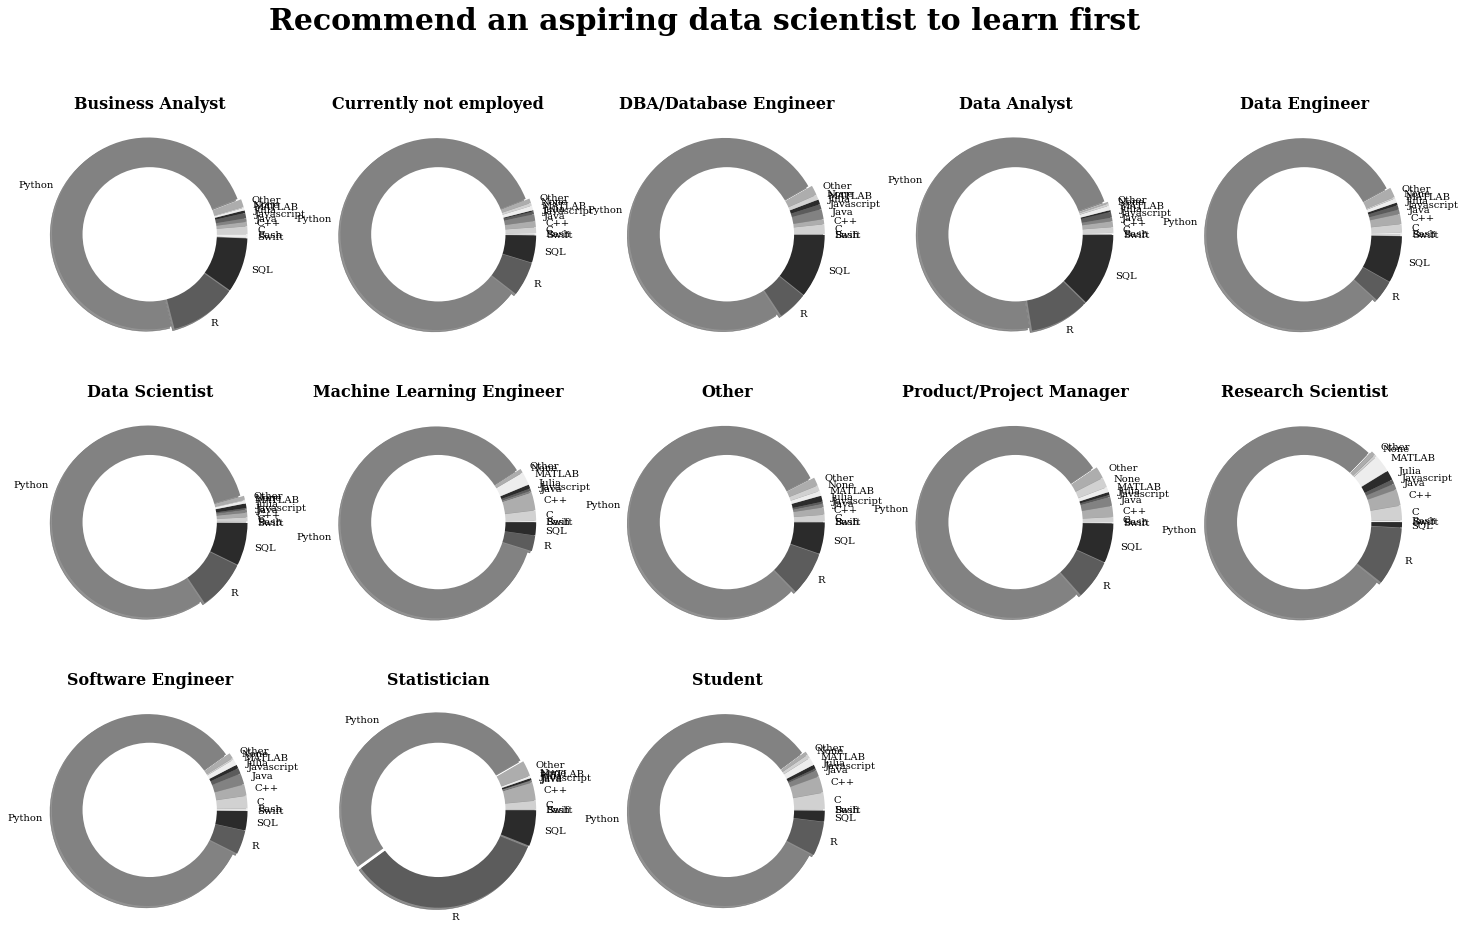

In [ ]:
j_p = data.groupby(['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'])['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].value_counts().unstack().fillna(0).T
fig = plt.figure(figsize=(25,15))
for i,j in enumerate(j_p.columns):
  ax = plt.subplot(3,5, i+1)
  ax.pie(x=j_p[j], labels=j_p[j].index, shadow=True, explode=[0.02 for i in range(len(j_p[j].index))], 
         colors=sns.color_palette('Greys'), startangle=0, pctdistance=.8, textprops={'weight':'light', 'family':'serif'})
  ax.set_title(f'{j}', fontsize=16, fontfamily='serif', fontweight='bold')
  centre_circle = plt.Circle((0,0), 0.70, color='black', fc='white', linewidth=0)
  ax.add_artist(centre_circle)

plt.suptitle('Recommend an aspiring data scientist to learn first', fontsize=30, fontweight='bold', fontfamily='serif')

Text(0.5, 0.98, 'Recommend an aspiring data scientist to learn first by Degree')

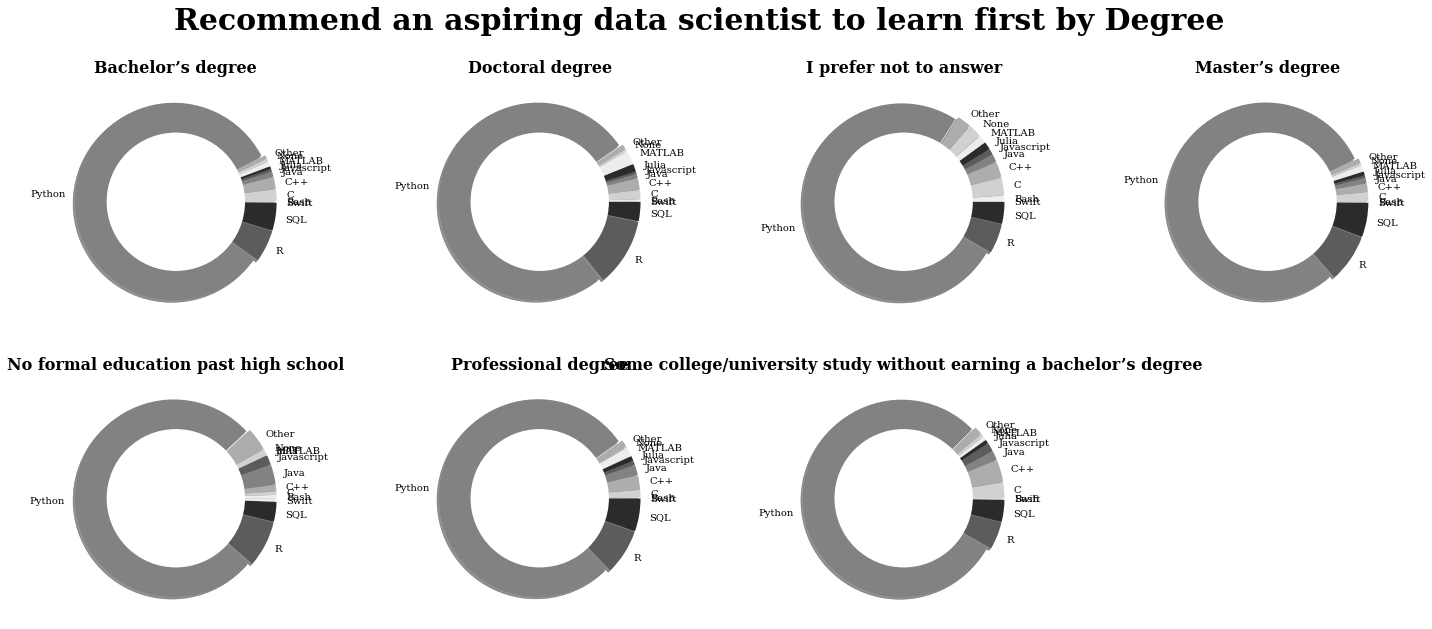

In [27]:
d_p = data.groupby(['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'])['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].value_counts().unstack().fillna(0).astype('int').T

fig = plt.figure(figsize=(25,10))
for i,j in enumerate(d_p.columns):
  ax = plt.subplot(2,4, i+1)
  ax.pie(x=d_p[j], labels=d_p[j].index, shadow=True, explode=[0.02 for i in range(len(d_p[j].index))], 
         colors=sns.color_palette('Greys'), startangle=0, pctdistance=.8, textprops={'weight':'light', 'family':'serif'})
  ax.set_title(f'{j}', fontsize=16, fontfamily='serif', fontweight='bold')
  centre_circle = plt.Circle((0,0), 0.70, color='black', fc='white', linewidth=0)
  ax.add_artist(centre_circle)

plt.suptitle('Recommend an aspiring data scientist to learn first by Degree', fontsize=30, fontweight='bold', fontfamily='serif')

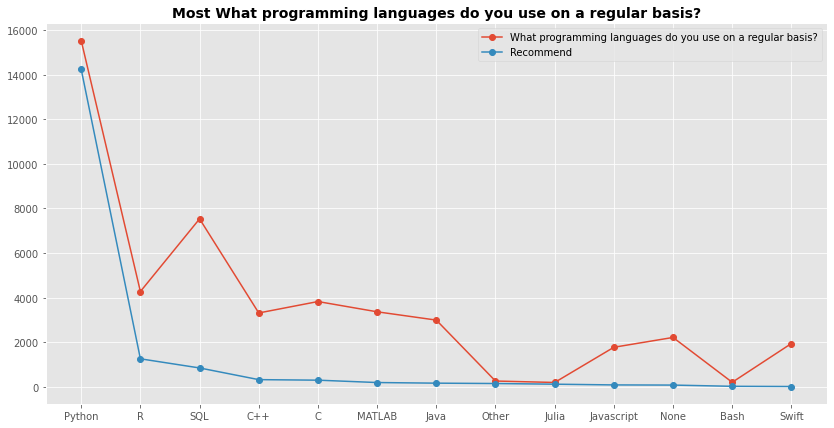

In [ ]:
# 파이썬의 위엄(압도적)...
severalcolumns_plot(data, 'What programming languages do you use on a regular basis?')
data['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].value_counts().plot(marker='o', label='Recommend')
plt.legend()

# 2017 Year version

In [76]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle survey/2017/multipleChoiceResponses.csv', encoding='ISO-8859-1')

In [77]:
data['Country'] = data['Country'].replace({'United States':'USA', 'United Kingdom':'UK', 'Czech Republic':'Czech', "People 's Republic of China":'China', 'Republic of China':'China'})
data['GenderSelect'] = data['GenderSelect'].replace({'Non-binary, genderqueer, or gender non-conforming':np.NaN, 'Non-binary':np.NaN, 'A different identity':np.NaN})

Text(0.5, 1.0, 'Distribution of Gender Normalize Ratio')

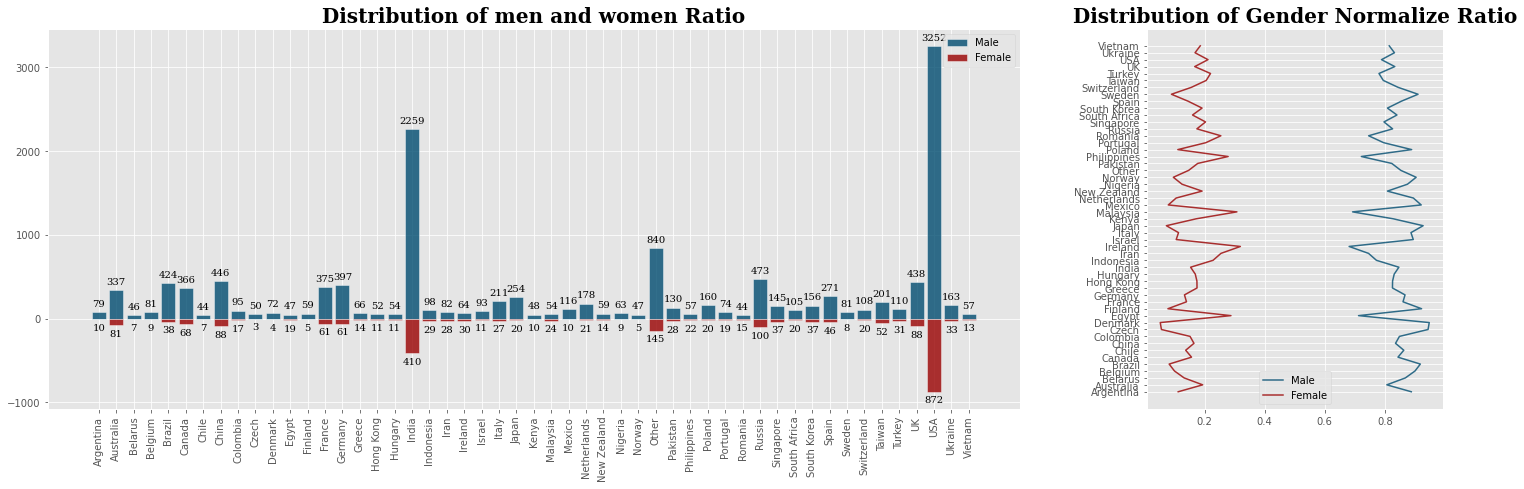

In [80]:
j_g = data.groupby('Country')['GenderSelect'].value_counts().unstack()
j_g_norm = data.groupby('Country')['GenderSelect'].value_counts(normalize=True).unstack()



fig, ax = plt.subplots(1,2,figsize=(25,7), gridspec_kw={'width_ratios':[2.3, 0.7]})
ax[0].bar(j_g.index, j_g['Male'], label='Male', color='#004c70', alpha=0.8, edgecolor='white')
for j, i in enumerate(j_g.index):
  ax[0].annotate(f"{j_g['Male'].loc[i]}", xy=(j, j_g['Male'].loc[i]+100), ha='center', va='center', fontweight='light', fontfamily='serif')
ax[0].bar(j_g.index, -j_g['Female'], label='Female', color='#990000', alpha=0.8, edgecolor='white')
for j, i in enumerate(j_g.index):
  ax[0].annotate(f"{j_g['Female'].loc[i]}", xy=(j, -j_g['Female'].loc[i]-100), ha='center', va='center', fontweight='light', fontfamily='serif')

ax[0].legend()
ax[0].set_xticklabels(j_g.index ,rotation=90)
ax[0].set_title('Distribution of men and women Ratio', fontdict=font)

ax[1].plot(j_g_norm['Male'], j_g_norm.index, color='#004c70', label='Male', alpha=0.8)
ax[1].plot(j_g_norm['Female'], j_g_norm.index, color='#990000', label='Female', alpha=0.8)
ax[1].legend()
ax[1].set_title('Distribution of Gender Normalize Ratio', fontdict=font)

In [7]:
sns.diverging_palette(220, 20)

[(0.24715576253545807, 0.49918708160096675, 0.5765599057376697),
 (0.5234922097901006, 0.6783143439466721, 0.7264644010051908),
 (0.8025272551624643, 0.8591908959637222, 0.8778328073593089),
 (0.9140860646530862, 0.8246826885128927, 0.8028133239419792),
 (0.8384144678873866, 0.5785740917778832, 0.5129511551488873),
 (0.7634747047461135, 0.3348456555528834, 0.225892295531744)]